# Training a normalizing flow

This notebook explores how we can use Torchflows to train a normalizing flow given a dataset.

## Basic training
In the cell below, we generate a synthetic dataset of 50-dimensional vectors. We then create a RealNVP model and fit it to the dataset. 

In [1]:
import torch
from torchflows.flows import Flow
from torchflows.architectures import RealNVP

torch.manual_seed(0)  # random seed for reproducibility
event_shape = (50,)  # shape of data points
x_train = torch.randn(1000, *event_shape) * 5 + 7  # generate the dataset
flow = Flow(RealNVP(event_shape=event_shape))  # create the flow
flow.fit(x_train, show_progress=True)  # train the flow

Fitting NF: 100%|██████████| 500/500 [00:08<00:00, 59.25it/s, Training loss (batch): 3.0914]


## Early stopping with validation data

If we have access to a validation set, we can automatically stop training when validation loss stops decreasing. In the cell below, we stop training when the validation loss has not decreased for 50 consecutive training steps.

In [2]:
torch.manual_seed(0)
x_val = torch.randn(200, *event_shape) * 5 + 7
flow = Flow(RealNVP(event_shape=event_shape))
flow.fit(x_train, x_val=x_val, early_stopping=True, early_stopping_threshold=50, show_progress=True, n_epochs=10000)

Fitting NF:  32%|███▎      | 3250/10000 [01:15<02:36, 43.23it/s, Training loss (batch): 3.0279, Validation loss: 3.0294 [best: 3.0294 @ 3199]]


## Visualize the results
We create a scatterplot to see if the train flow matches the training data. We draw 10000 samples from the trained flow.

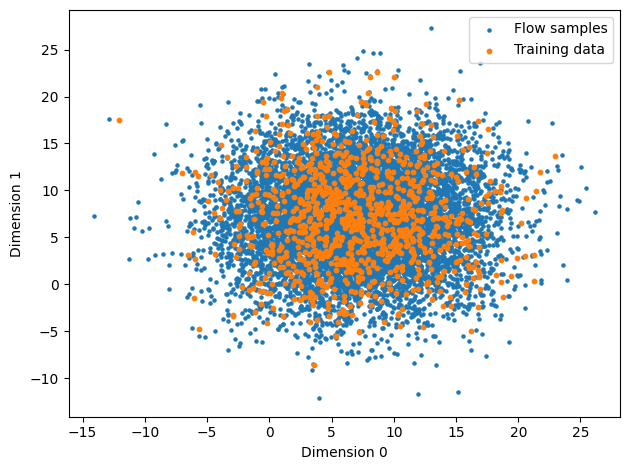

In [9]:
import matplotlib.pyplot as plt

torch.manual_seed(0)
x_flow = flow.sample((10000,)).detach()

fig, ax = plt.subplots()
ax.scatter(x_flow[:, 0], x_flow[:, 1], label='Flow samples', s=5)
ax.scatter(x_train[:, 0], x_train[:, 1], label='Training data', s=10)
ax.legend()
ax.set_xlabel('Dimension 0')
ax.set_ylabel('Dimension 1')
fig.tight_layout()
plt.show()